# Determination of Autism Among Toddlers

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importing Classifiers

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

### Importing Metrics

In [3]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

### Supressing Warnings

In [4]:
import warnings
warnings.filterwarnings("ignore")

### Loading Dataset

In [5]:
df=pd.read_csv('Autism_July_18.csv')
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


### Analysing Dataset & Preprocessing

In [6]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [7]:
df.drop(['Case_No', 'Who completed the test','Qchat-10-Score'], axis = 1, inplace = True)
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Class/ASD Traits '],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   A1                   1054 non-null   int64 
 1   A2                   1054 non-null   int64 
 2   A3                   1054 non-null   int64 
 3   A4                   1054 non-null   int64 
 4   A5                   1054 non-null   int64 
 5   A6                   1054 non-null   int64 
 6   A7                   1054 non-null   int64 
 7   A8                   1054 non-null   int64 
 8   A9                   1054 non-null   int64 
 9   A10                  1054 non-null   int64 
 10  Age_Mons             1054 non-null   int64 
 11  Sex                  1054 non-null   object
 12  Ethnicity            1054 non-null   object
 13  Jaundice             1054 non-null   object
 14  Family_mem_with_ASD  1054 non-null   object
 15  Class/ASD Traits     1054 non-null   object
dtypes: int

<AxesSubplot:title={'center':'Class Count Plot'}, xlabel='Autism Traits', ylabel='Number Of Cases'>

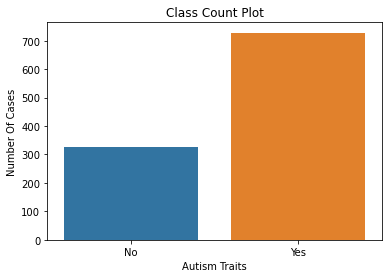

In [9]:
ClassCount=sns.countplot(x='Class/ASD Traits ' , data=df)
ClassCount.set(xlabel ='Autism Traits', ylabel = 'Number Of Cases',title='Class Count Plot')
ClassCount

[Text(0.5, 1.0, 'Correlation Between Variables')]

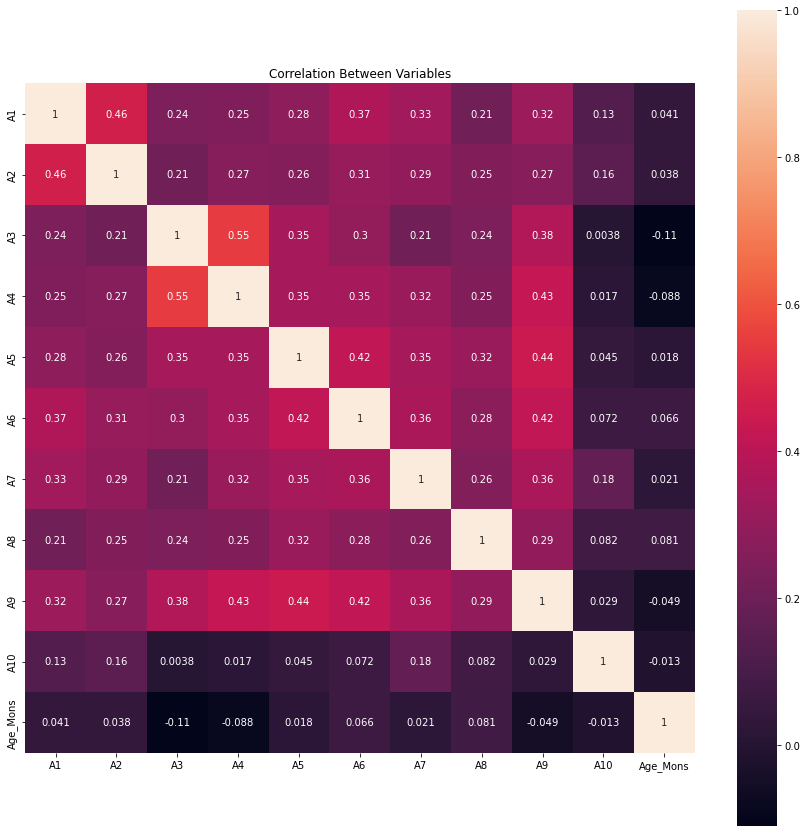

In [10]:
corr = df.corr()
plt.figure(figsize = (15,15))
CorrelationHM=sns.heatmap(data = corr, annot = True, square = True, cbar = True)
CorrelationHM.set(title='Correlation Between Variables')

<AxesSubplot:title={'center':'Sex Count Plot'}, xlabel='Sex', ylabel='Number Of Cases'>

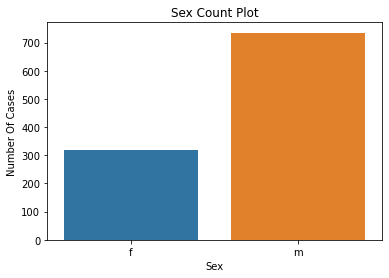

In [11]:
SexCount=sns.countplot(x='Sex',data=df)
SexCount.set(xlabel ='Sex', ylabel = 'Number Of Cases',title='Sex Count Plot')
SexCount

<AxesSubplot:title={'center':'Ethnicity Count Plot'}, xlabel='Ethnicity', ylabel='Number Of Cases'>

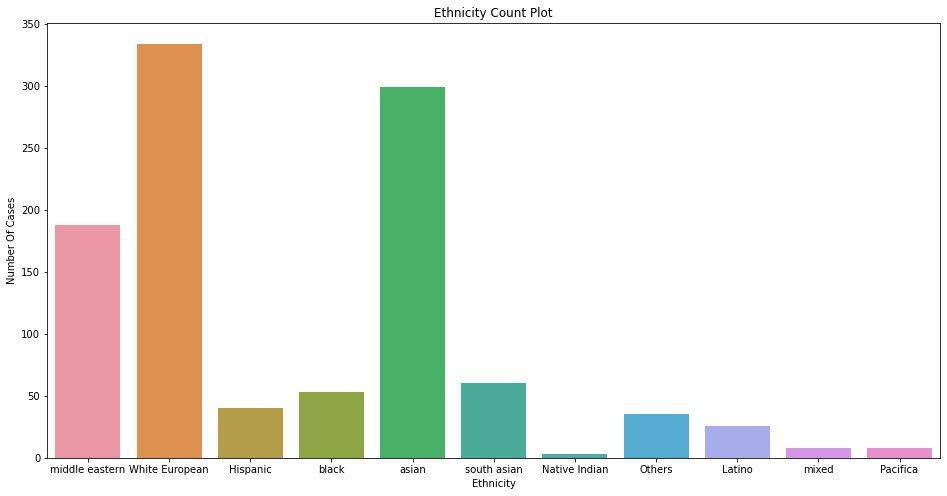

In [12]:
plt.figure(figsize = (16,8))
EthCount=sns.countplot(x = 'Ethnicity', data = df)
EthCount.set(xlabel ='Ethnicity', ylabel = 'Number Of Cases',title='Ethnicity Count Plot')
EthCount

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
catCols = [col for col in df.columns if df[col].dtype=='O']
for col in catCols:
    df[col] = le.fit_transform(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   A1                   1054 non-null   int64
 1   A2                   1054 non-null   int64
 2   A3                   1054 non-null   int64
 3   A4                   1054 non-null   int64
 4   A5                   1054 non-null   int64
 5   A6                   1054 non-null   int64
 6   A7                   1054 non-null   int64
 7   A8                   1054 non-null   int64
 8   A9                   1054 non-null   int64
 9   A10                  1054 non-null   int64
 10  Age_Mons             1054 non-null   int64
 11  Sex                  1054 non-null   int32
 12  Ethnicity            1054 non-null   int32
 13  Jaundice             1054 non-null   int32
 14  Family_mem_with_ASD  1054 non-null   int32
 15  Class/ASD Traits     1054 non-null   int32
dtypes: int32(5), int64(11)
m

### Preparing Train & Test Data

In [14]:
from sklearn.model_selection import train_test_split
x = df.drop(['Class/ASD Traits '], axis = 1)
y = df['Class/ASD Traits ']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

## Classification Using Various Classifiers

### 1 : Decision Tree Classifier

Classification Report For Decision Tree Classifier :

               precision    recall  f1-score   support

           0       0.81      0.90      0.85        61
           1       0.96      0.91      0.94       150

    accuracy                           0.91       211
   macro avg       0.88      0.91      0.89       211
weighted avg       0.91      0.91      0.91       211
 



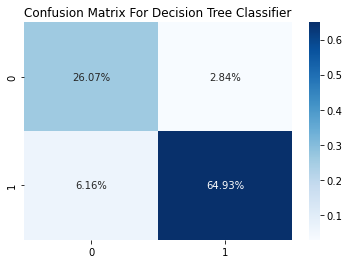

In [15]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtcpred = dtc.predict(x_test)
print("Classification Report For Decision Tree Classifier :\n\n",classification_report(y_test,dtcpred),"\n")
dtcConfMatrix=confusion_matrix(y_test,dtcpred)
dtcConfMatrixGraph=sns.heatmap(dtcConfMatrix/np.sum(dtcConfMatrix), annot=True, fmt='.2%', cmap='Blues')
dtcConfMatrixGraph.set(title='Confusion Matrix For Decision Tree Classifier')
dtcConfMatrixGraph
dtcScore=accuracy_score(y_test,dtcpred)

### 2 : Random Forest Classifier

Classification Report For Random Forest Classifier :

               precision    recall  f1-score   support

           0       0.98      0.97      0.98        61
           1       0.99      0.99      0.99       150

    accuracy                           0.99       211
   macro avg       0.99      0.98      0.98       211
weighted avg       0.99      0.99      0.99       211
 

[0.08542414 0.07979418 0.04209267 0.07039154 0.12085136 0.12269908
 0.11503584 0.05756702 0.1471835  0.03052592 0.05057075 0.013756
 0.03932492 0.01445132 0.01033176]


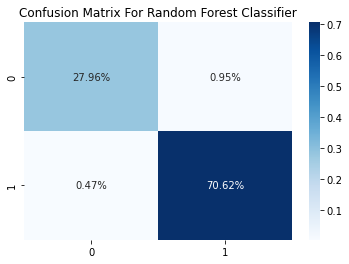

In [23]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfcpred = rfc.predict(x_test)
print("Classification Report For Random Forest Classifier :\n\n",classification_report(y_test,rfcpred),"\n")
rfcConfMatrix=confusion_matrix(y_test,rfcpred)
rfcConfMatrixGraph=sns.heatmap(rfcConfMatrix/np.sum(rfcConfMatrix), annot=True, fmt='.2%', cmap='Blues')
rfcConfMatrixGraph.set(title='Confusion Matrix For Random Forest Classifier')
rfcConfMatrixGraph
rfcScore=accuracy_score(y_test,rfcpred)

### 3 : Support Vector Machine (SVM)

Classification Report For Support Vector Machine :

               precision    recall  f1-score   support

           0       0.97      0.62      0.76        61
           1       0.87      0.99      0.93       150

    accuracy                           0.89       211
   macro avg       0.92      0.81      0.84       211
weighted avg       0.90      0.89      0.88       211
 



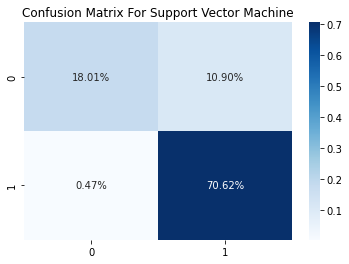

In [17]:
svm = SVC()
svm.fit(x_train, y_train)
svmpred = svm.predict(x_test)
print("Classification Report For Support Vector Machine :\n\n",classification_report(y_test,svmpred),"\n")
svmConfMatrix=confusion_matrix(y_test,svmpred)
svmConfMatrixGraph=sns.heatmap(svmConfMatrix/np.sum(svmConfMatrix), annot=True, fmt='.2%', cmap='Blues')
svmConfMatrixGraph.set(title='Confusion Matrix For Support Vector Machine')
svmConfMatrixGraph
svmScore=accuracy_score(y_test,svmpred)

### 4 : K Nearest Neighbors (KNN)

 ##### Determining Optimal Value of K


Minimum error : 0.07109004739336493 at K = 20


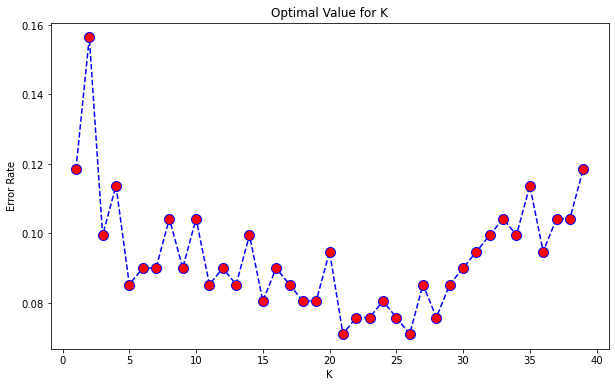

In [18]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Optimal Value for K')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("\nMinimum error :",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Classification Report For K Nearest Neighbor :

               precision    recall  f1-score   support

           0       0.79      0.89      0.84        61
           1       0.95      0.91      0.93       150

    accuracy                           0.90       211
   macro avg       0.87      0.90      0.88       211
weighted avg       0.91      0.90      0.90       211
 



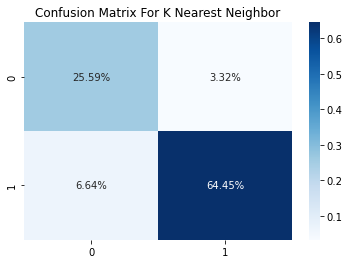

In [19]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
knnpred = knn.predict(x_test)
print("Classification Report For K Nearest Neighbor :\n\n",classification_report(y_test,knnpred),"\n")
knnConfMatrix=confusion_matrix(y_test,knnpred)
knnConfMatrixGraph=sns.heatmap(knnConfMatrix/np.sum(knnConfMatrix), annot=True, fmt='.2%', cmap='Blues')
knnConfMatrixGraph.set(title='Confusion Matrix For K Nearest Neighbor')
knnConfMatrixGraph
knnScore=accuracy_score(y_test,knnpred)

### 5 : Logistic Regression

Classification Report For Logistic Regression :

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00       150

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211
 



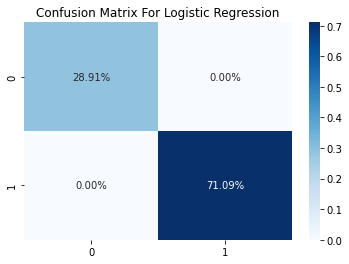

In [20]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logregpred = logreg.predict(x_test)
print("Classification Report For Logistic Regression :\n\n",classification_report(y_test,logregpred),"\n")
logregConfMatrix=confusion_matrix(y_test,logregpred)
logregConfMatrixGraph=sns.heatmap(logregConfMatrix/np.sum(logregConfMatrix), annot=True, fmt='.2%', cmap='Blues')
logregConfMatrixGraph.set(title='Confusion Matrix For Logistic Regression')
logregConfMatrixGraph
logregScore=logreg.score(x_train, y_train)

### 6 : Naive Bayes Classifier

Classification Report For Naive Bayes Classifier :

               precision    recall  f1-score   support

           0       0.92      0.92      0.92        61
           1       0.97      0.97      0.97       150

    accuracy                           0.95       211
   macro avg       0.94      0.94      0.94       211
weighted avg       0.95      0.95      0.95       211
 



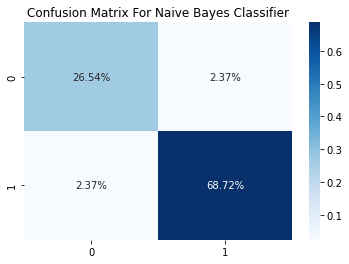

In [21]:
nb = GaussianNB()
nb.fit(x_train, y_train)
nbpred = nb.predict(x_test)
print("Classification Report For Naive Bayes Classifier :\n\n",classification_report(y_test,nbpred),"\n")
nbConfMatrix=confusion_matrix(y_test,nbpred)
nbConfMatrixGraph=sns.heatmap(nbConfMatrix/np.sum(nbConfMatrix), annot=True, fmt='.2%', cmap='Blues')
nbConfMatrixGraph.set(title='Confusion Matrix For Naive Bayes Classifier')
nbConfMatrixGraph
nbScore=accuracy_score(y_test,nbpred)

## Comparing Accuracy

<AxesSubplot:title={'center':'Accuracy of Various Classifiers'}, xlabel='Classifier', ylabel='Accuracy %'>

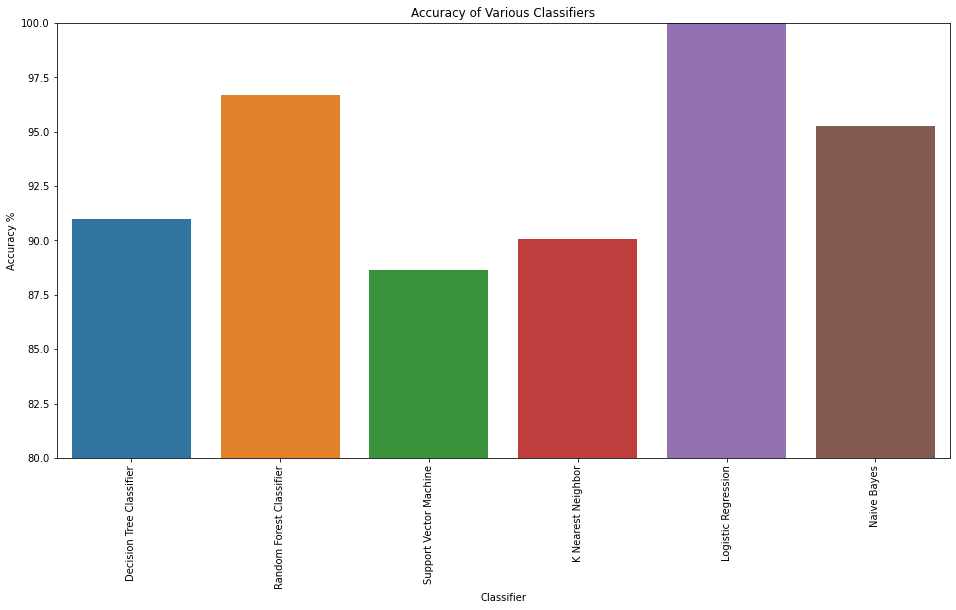

In [22]:
y=[i*100 for i in [dtcScore,rfcScore,svmScore,knnScore,logregScore,nbScore]]
x=['Decision Tree Classifier','Random Forest Classifier','Support Vector Machine','K Nearest Neighbor','Logistic Regression','Naive Bayes']
plt.figure(figsize = (16,8))
compareAcc=sns.barplot(x,y)
compareAcc.set(title='Accuracy of Various Classifiers',xlabel='Classifier',ylabel='Accuracy %')
plt.xticks(rotation=90)
plt.ylim(80, 100)
compareAcc